In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv(r"D:\Microsoft Project\nearest earth objects.csv")

In [3]:
Data.shape

(338199, 9)

In [4]:
Data.head(10)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401050,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506800,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076810,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519480,6.311863e+07,False
5,3656926,(2014 BT8),25.00,0.026580,0.059435,Earth,47477.649830,4.290521e+07,False
6,3421513,(2008 OX1),21.50,0.133216,0.297879,Earth,57853.295350,2.727908e+07,True
7,3541504,(2010 OF101),19.75,0.298233,0.666868,Earth,46972.486790,6.997593e+07,False
8,3836942,(2018 YH),21.70,0.121494,0.271669,Earth,37424.548380,5.657727e+06,True
9,3892166,(2019 UP13),23.45,0.054269,0.121350,Earth,38524.867870,6.166118e+07,False


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [6]:
Data.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346432,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031470,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465470,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820615,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [7]:
missing_values = Data.isnull().sum()

In [8]:
missing_values

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [9]:
Data.duplicated().sum()


0

In [10]:
# Handle missing values by filling with the mean for numerical columns
Data['absolute_magnitude'].fillna(Data['absolute_magnitude'].mean(), inplace=True)
Data['estimated_diameter_min'].fillna(Data['estimated_diameter_min'].mean(), inplace=True)
Data['estimated_diameter_max'].fillna(Data['estimated_diameter_max'].mean(), inplace=True)

In [11]:
missing_values = Data.isnull().sum()
missing_values

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

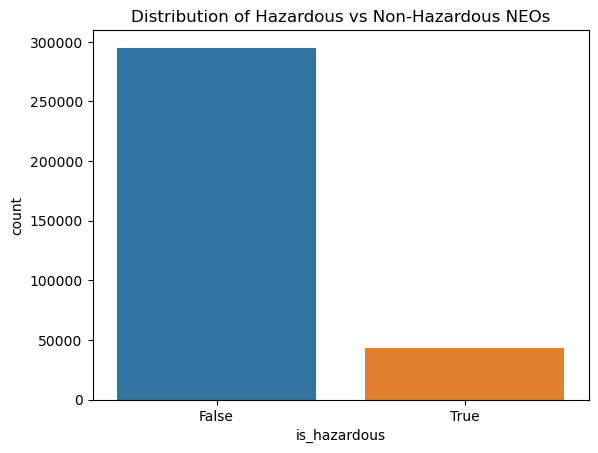

In [12]:
# Distribution of 'is_hazardous'
sns.countplot(x='is_hazardous', data=Data)
plt.title('Distribution of Hazardous vs Non-Hazardous NEOs')
plt.show()

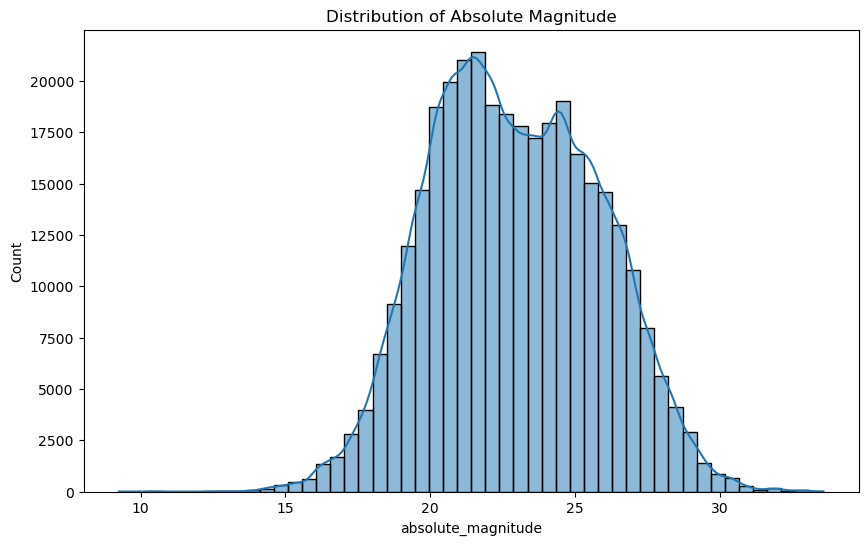

In [13]:
# Distribution of Absolute Magnitude
plt.figure(figsize=(10, 6))
sns.histplot(Data['absolute_magnitude'], bins=50, kde=True)
plt.title('Distribution of Absolute Magnitude')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13956\555944445.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Data.corr()


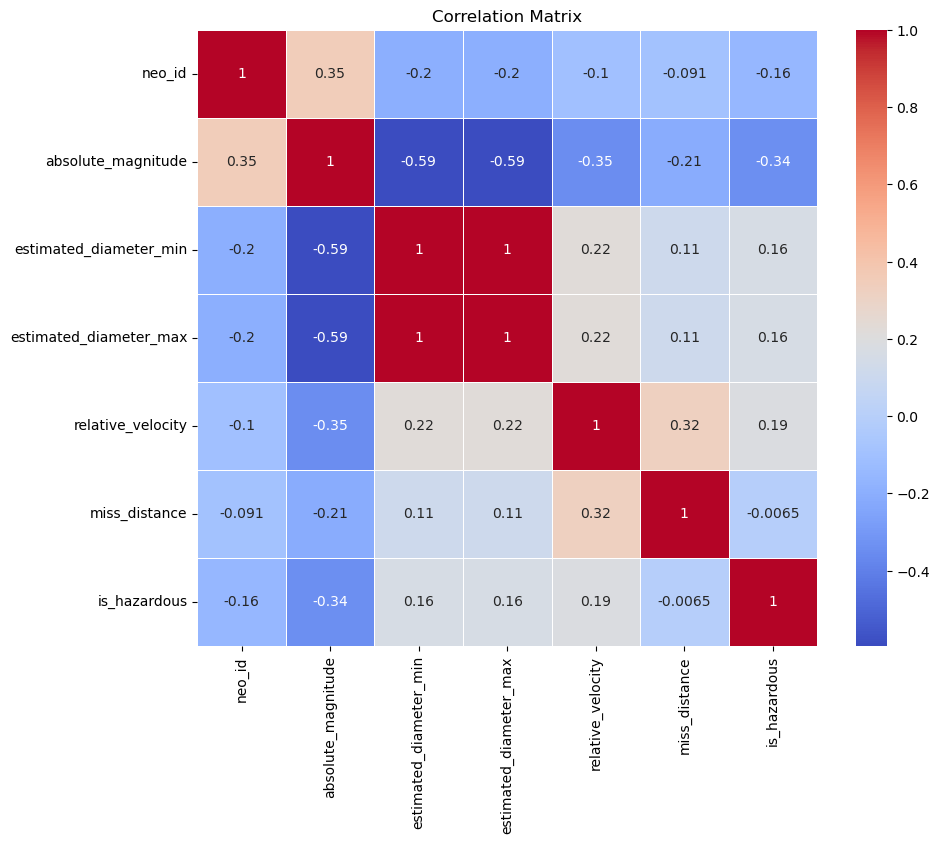

In [14]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = Data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

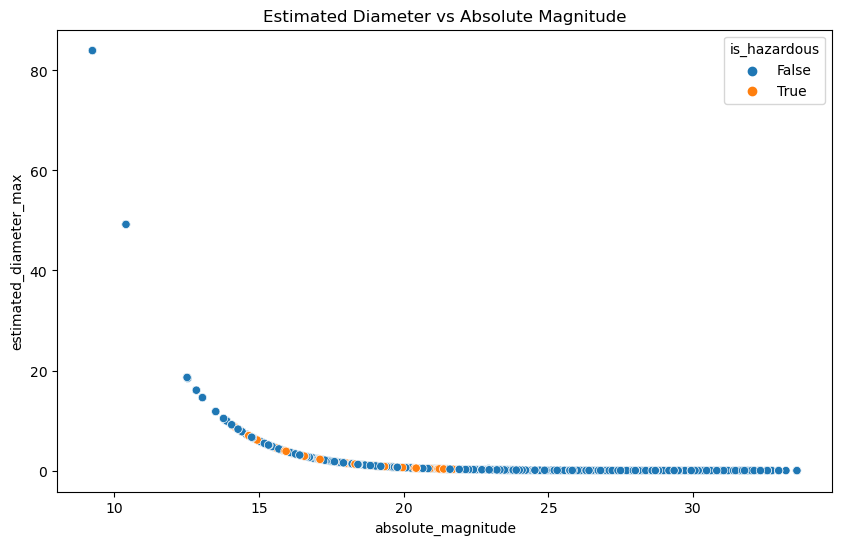

In [15]:
# Scatter plot of Estimated Diameter vs Absolute Magnitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='absolute_magnitude', y='estimated_diameter_max', hue='is_hazardous', data=Data)
plt.title('Estimated Diameter vs Absolute Magnitude')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [17]:
# Encoding the 'orbiting_body' column
label_encoder = LabelEncoder()
Data['orbiting_body'] = label_encoder.fit_transform(Data['orbiting_body'])

In [18]:
Data.columns

Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')

In [19]:
# Feature selection
X = Data.drop(['neo_id', 'name', 'is_hazardous'], axis=1)
y = Data['is_hazardous']

In [20]:
# Handle imbalanced classes using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [21]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [22]:
# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [25]:
# Predict and evaluate the Logistic Regression model
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

       False       0.88      0.72      0.79     88580
        True       0.76      0.90      0.83     88443

    accuracy                           0.81    177023
   macro avg       0.82      0.81      0.81    177023
weighted avg       0.82      0.81      0.81    177023

Confusion Matrix:
[[63376 25204]
 [ 8497 79946]]


In [26]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_accuracy

0.8096236082316987

In [27]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
# Predict and evaluate the Random Forest model

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Report:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     88580
        True       0.95      0.95      0.95     88443

    accuracy                           0.95    177023
   macro avg       0.95      0.95      0.95    177023
weighted avg       0.95      0.95      0.95    177023

Confusion Matrix:
[[83941  4639]
 [ 4505 83938]]


In [29]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_accuracy 

0.9483456951921502

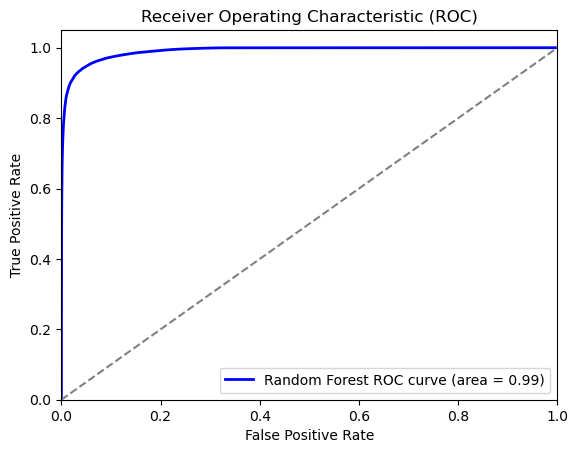

In [30]:
# Plot ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()